In [1]:
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df=pd.read_csv("214_Temp.csv")

In [3]:
df.head()

,Date,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
0,1/15/2020 1:50,67.1,72.75,68,1/14/2020 1:50,68.4,1/13/2020 1:50,67.4
1,1/15/2020 3:50,67.8,71.73,66,1/14/2020 3:50,68.6,1/13/2020 3:50,67.5
2,1/15/2020 5:50,68.3,71.03,68,1/14/2020 5:50,68.8,1/13/2020 5:50,67.5
3,1/15/2020 7:50,65.0,73.98,72,1/14/2020 7:50,65.4,1/13/2020 7:50,67.0
4,1/15/2020 9:50,64.0,75.90,75,1/14/2020 9:50,64.0,1/13/2020 9:50,67.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
Date                           384 non-null object
Temperature                    384 non-null float64
Humidity                       384 non-null float64
Outside Temperature            384 non-null int64
Previous Date                  384 non-null object
Temperature on Previous day    384 non-null float64
2 days before Date             384 non-null object
Temperature 2 days before      384 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 24.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [6]:
df.tail()

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,
2020-02-15 15:50:00,61.8,54.50,62,2/14/2020 15:50,64.4,2/13/2020 15:50,62.3
2020-02-15 17:50:00,66.0,51.36,62,2/14/2020 17:50,62.4,2/13/2020 17:50,61.9
2020-02-15 19:50:00,67.4,50.49,63,2/14/2020 19:50,63.6,2/13/2020 19:50,61.9
2020-02-15 21:50:00,68.1,50.16,61,2/14/2020 21:50,66.7,2/13/2020 21:50,64.9
2020-02-15 23:50:00,67.1,51.29,59,2/14/2020 23:50,65.4,2/13/2020 23:50,64.3


In [7]:
df.dropna(inplace=True)

In [8]:
ts=df.loc['1/15/2020':'2/15/2020',['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
#ts=pd.concat([df.loc['2/03/2020':'2/07/2020'],df.loc['2/10/2020':'2/14/2020']])[['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
ts=pd.DataFrame(ts)
ts.head()

,Temperature,Humidity,Outside Temperature,Temperature on Previous day,Temperature 2 days before
Date,,,,,
2020-01-15 01:50:00,67.1,72.75,68,68.4,67.4
2020-01-15 03:50:00,67.8,71.73,66,68.6,67.5
2020-01-15 05:50:00,68.3,71.03,68,68.8,67.5
2020-01-15 07:50:00,65.0,73.98,72,65.4,67.0
2020-01-15 09:50:00,64.0,75.90,75,64.0,67.6


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


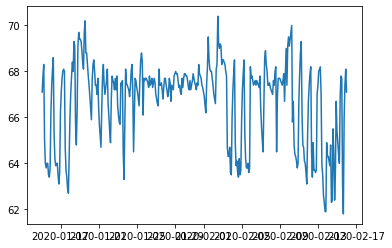

In [9]:
plt.plot(ts['Temperature'])

In [10]:
values=ts.values

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [12]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [13]:
reframed = series_to_supervised(scaled, 12, 1)

In [14]:
reframed.head()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
12,0.616279,0.846043,0.804348,0.764706,0.647059,0.697674,0.821506,0.760870,0.788235,0.658824,...,0.511628,0.889343,0.717391,0.470588,0.729412,0.651163,0.848689,0.717391,0.611765,0.764706
13,0.697674,0.821506,0.760870,0.788235,0.658824,0.755814,0.804667,0.804348,0.811765,0.658824,...,0.651163,0.848689,0.717391,0.611765,0.764706,0.732558,0.821746,0.760870,0.694118,0.788235
14,0.755814,0.804667,0.804348,0.811765,0.658824,0.372093,0.875631,0.891304,0.411765,0.600000,...,0.732558,0.821746,0.760870,0.694118,0.788235,0.790698,0.807072,0.760870,0.752941,0.811765
15,0.372093,0.875631,0.891304,0.411765,0.600000,0.255814,0.921819,0.956522,0.247059,0.670588,...,0.790698,0.807072,0.760870,0.752941,0.811765,0.406977,0.878518,0.847826,0.364706,0.411765
16,0.255814,0.921819,0.956522,0.247059,0.670588,0.232558,0.947558,0.956522,0.200000,0.658824,...,0.406977,0.878518,0.847826,0.364706,0.411765,0.279070,0.923021,0.913043,0.247059,0.247059


In [15]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[61,62,63,64]], axis=1, inplace=True)

In [16]:
reframed.tail()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
379,0.302326,0.410392,0.456522,0.047059,0.211765,0.069767,0.476064,0.347826,0.000000,0.200000,...,0.133510,0.717391,0.058824,0.188235,0.151163,0.305749,0.760870,0.423529,0.082353,0.000000
380,0.069767,0.476064,0.347826,0.000000,0.200000,0.209302,0.444070,0.239130,0.000000,0.211765,...,0.305749,0.760870,0.423529,0.082353,0.000000,0.407024,0.673913,0.294118,0.047059,0.488372
381,0.209302,0.444070,0.239130,0.000000,0.211765,0.569767,0.320904,0.173913,0.352941,0.600000,...,0.407024,0.673913,0.294118,0.047059,0.488372,0.331489,0.673913,0.058824,0.000000,0.651163
382,0.569767,0.320904,0.173913,0.352941,0.600000,0.418605,0.356026,0.195652,0.282353,0.647059,...,0.331489,0.673913,0.058824,0.000000,0.651163,0.310561,0.695652,0.200000,0.000000,0.732558
383,0.418605,0.356026,0.195652,0.282353,0.647059,0.360465,0.352177,0.260870,0.282353,0.717647,...,0.310561,0.695652,0.200000,0.000000,0.732558,0.302622,0.652174,0.564706,0.352941,0.616279


In [17]:
# split into train and test sets
values = reframed.values
n_train = 276
train = values[:n_train, :]
test = values[n_train:, :]

In [18]:
test.shape

(96, 61)

In [19]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

(276, 60) (96, 60) (276,) (96,)


In [20]:
# specify the number of lag hours
n_hours = 12
n_features = 5

In [21]:
# split into input and outputs
#n_obs = n_hours * n_features
#train_X, train_y = train[:, :n_obs], train[:, -n_features]
#test_X, test_y = test[:, :n_obs], test[:, -n_features]
#print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

In [22]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

In [23]:
print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

(276, 12, 5) (96, 12, 5) (276,) (96,)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 276 samples, validate on 96 samples
Epoch 1/30
 - 1s - loss: 0.5982 - val_loss: 0.2535
Epoch 2/30
 - 0s - loss: 0.1934 - val_loss: 0.3379
Epoch 3/30
 - 0s - loss: 0.1799 - val_loss: 0.2223
Epoch 4/30
 - 0s - loss: 0.1608 - val_loss: 0.2203
Epoch 5/30
 - 0s - loss: 0.1350 - val_loss: 0.2351
Epoch 6/30
 - 0s - loss: 0.1324 - val_loss: 0.2174
Epoch 7/30
 - 0s - loss: 0.1310 - val_loss: 0.2194
Epoch 8/30
 - 0s - loss: 0.1286 - val_loss: 0.2154
Epoch 9/30
 - 0s - loss: 0.1245 - val_loss: 0.2159
Epoch 10/30
 - 0s - loss: 0.1237 - val_loss: 0.2099
Epoch 11/30
 - 0s - loss: 0.1218 - val_loss: 0.2120
Epoch 12/30
 - 0s - loss: 0.1210 - val_loss: 0.2044
Epoch 13/30
 - 0s - loss: 0.1205 - val_loss: 0.2122
Epoch 14/30
 - 0s - loss: 0.1216 - val_loss: 0.1999
Epoch 15/30
 - 0s - loss: 0.1232 - val_loss: 0.2147
Epoch 16/30
 - 0s - loss: 0.1263 - val_loss: 0.1977
Epoch 17/30


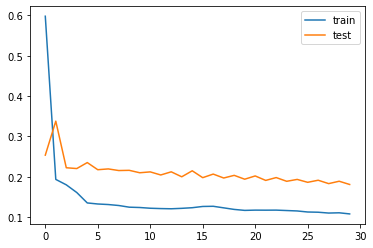

In [24]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [25]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]*test_X.shape[2]))

In [26]:
test_X.shape

(96, 60)

In [27]:
# invert scaling for forecast
testy_forecast = np.zeros(shape=(len(test_y), 5))

testy_forecast[:,0] = yhat[:,0]

inv_yhat = scaler.inverse_transform(testy_forecast)[:,0]

In [28]:
# invert scaling for actual test
testy_actual = np.zeros(shape=(len(test_y), 5))

testy_actual[:,0] = test_y

inv_y = scaler.inverse_transform(testy_actual)[:,0]

In [29]:
# invert scaling for actual train
trainy_actual = np.zeros(shape=(len(train_y), 5))

trainy_actual[:,0] = train_y

inv_y_train = scaler.inverse_transform(trainy_actual)[:,0]

In [30]:
inv_yhat

array([67.07528445, 67.13112555, 67.16593928, 67.18094462, 67.33652998,
       67.40794131, 67.50352172, 67.57304257, 67.00437444, 67.07497483,
       67.20292286, 67.30540645, 67.31890116, 67.27990409, 67.20617992,
       67.11408877, 67.16675483, 67.30331453, 67.22170503, 67.36826863,
       67.54236295, 67.48301413, 67.7601964 , 67.97364661, 68.0309927 ,
       68.12997062, 68.22500921, 68.33349535, 67.71788896, 67.5886333 ,
       67.1094031 , 66.82709483, 66.56252047, 66.29688144, 66.15474926,
       66.05369659, 66.3943718 , 66.7518226 , 67.0884311 , 67.34557583,
       66.87201345, 66.52373357, 66.29265813, 66.08970366, 65.99584969,
       65.90022084, 65.78596205, 66.07861894, 66.50569979, 66.8343799 ,
       67.10937644, 67.31843162, 66.69064072, 66.15938522, 66.05536485,
       65.74302745, 65.58563415, 65.49310166, 65.4500348 , 66.01669866,
       66.45700485, 66.90683078, 67.26015259, 67.53710368, 67.41473172,
       66.83827361, 66.45897169, 65.99299835, 65.63646689, 65.30

In [31]:
inv_y

array([67.2, 67.1, 67. , 67.6, 67.4, 68. , 68.2, 64.5, 66.9, 67.7, 67.7,
       67.7, 67.6, 67.5, 67.4, 67.6, 67.9, 66.7, 67.9, 69. , 67.4, 69.1,
       69.5, 69.1, 69.4, 69.7, 70. , 65.8, 66.7, 64.8, 64.4, 64.3, 64.1,
       63.8, 64. , 66.7, 67.9, 68.8, 69.3, 66.2, 64.8, 64.7, 64.1, 64. ,
       63.6, 63.1, 65.2, 66.7, 67.4, 67.9, 68.2, 64.5, 63.4, 64.9, 63.7,
       63.7, 63.6, 63.7, 67. , 67.4, 68. , 68.1, 68.2, 67. , 63.9, 63.5,
       62.6, 62.3, 61.9, 61.9, 64.9, 64.3, 64.3, 64.1, 63.9, 64.8, 62.3,
       62.4, 65.5, 64.4, 62.4, 63.6, 66.7, 65.4, 64.9, 64.4, 64. , 66.9,
       67.8, 67.7, 63.1, 61.8, 66. , 67.4, 68.1, 67.1])

In [32]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.878


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Temperature (F)')

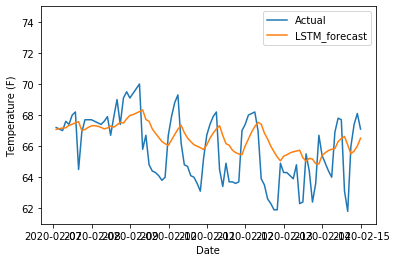

In [34]:
plt.plot(ts.index[276:372],inv_y,label='Actual')
plt.plot(ts.index[276:372],inv_yhat,label='LSTM_forecast')
plt.legend(loc="upper right")
plt.ylim(61,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

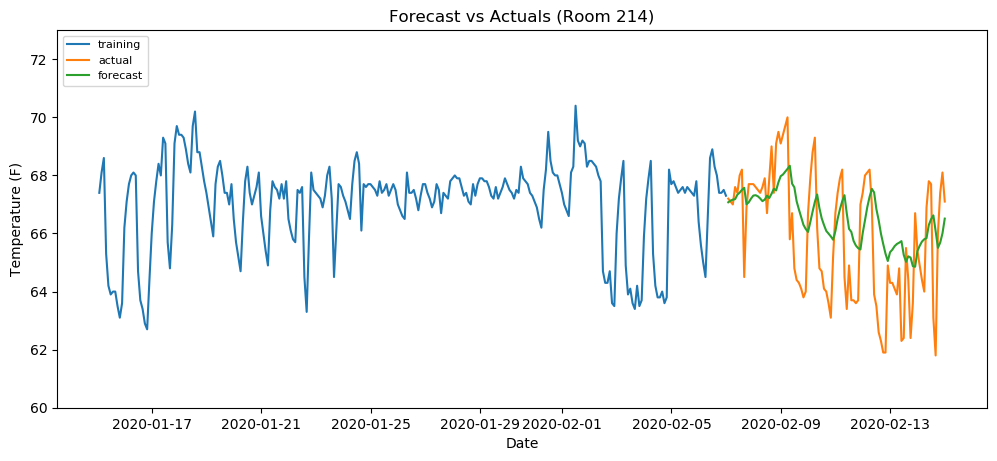

In [35]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts.index[:276],inv_y_train, label='training')
plt.plot(ts.index[276:372],inv_y, label='actual')
plt.plot(ts.index[276:372],inv_yhat, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals (Room 214)')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(60,73)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

# Linear regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regressor = LinearRegression()

In [38]:
train_X_lr, train_y_lr = train[:, :-1], train[:, -1]
test_X_lr, test_y_lr = test[:, :-1], test[:, -1]

In [39]:
regressor.fit(train_X_lr,train_y_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred= regressor.predict(test_X_lr)

In [41]:
#Invert scaling for forecast
testy_forecast_lr = np.zeros(shape=(len(test_y_lr), 5))

testy_forecast_lr[:,0] = y_pred

inv_yhat_lr = scaler.inverse_transform(testy_forecast_lr)[:,0]

In [42]:
inv_yhat_lr.shape

(96,)

In [43]:
#Invert scaling for actual
# invert scaling for actual

testy_actual_lr = np.zeros(shape=(len(test_y_lr), 5))

testy_actual_lr[:,0] = test_y_lr

inv_y_lr = scaler.inverse_transform(testy_actual_lr)[:,0]

In [44]:
inv_y_lr

array([67.2, 67.1, 67. , 67.6, 67.4, 68. , 68.2, 64.5, 66.9, 67.7, 67.7,
       67.7, 67.6, 67.5, 67.4, 67.6, 67.9, 66.7, 67.9, 69. , 67.4, 69.1,
       69.5, 69.1, 69.4, 69.7, 70. , 65.8, 66.7, 64.8, 64.4, 64.3, 64.1,
       63.8, 64. , 66.7, 67.9, 68.8, 69.3, 66.2, 64.8, 64.7, 64.1, 64. ,
       63.6, 63.1, 65.2, 66.7, 67.4, 67.9, 68.2, 64.5, 63.4, 64.9, 63.7,
       63.7, 63.6, 63.7, 67. , 67.4, 68. , 68.1, 68.2, 67. , 63.9, 63.5,
       62.6, 62.3, 61.9, 61.9, 64.9, 64.3, 64.3, 64.1, 63.9, 64.8, 62.3,
       62.4, 65.5, 64.4, 62.4, 63.6, 66.7, 65.4, 64.9, 64.4, 64. , 66.9,
       67.8, 67.7, 63.1, 61.8, 66. , 67.4, 68.1, 67.1])

Text(0, 0.5, 'Temperature (F)')

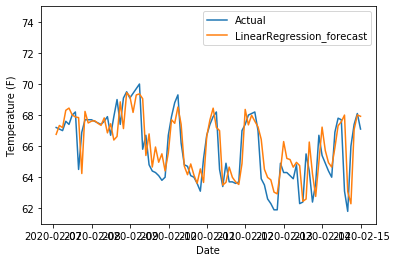

In [45]:
plt.plot(ts.index[276:372],inv_y_lr,label='Actual')
plt.plot(ts.index[276:372],inv_yhat_lr,label='LinearRegression_forecast')
plt.legend(loc="upper right")
plt.ylim(61,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

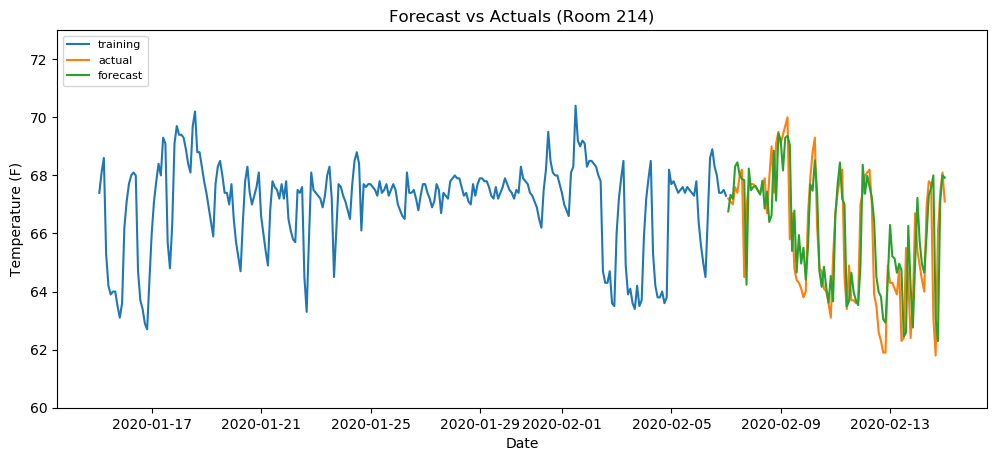

In [46]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts.index[:276],inv_y_train, label='training')
plt.plot(ts.index[276:372],inv_y_lr, label='actual')
plt.plot(ts.index[276:372],inv_yhat_lr, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals (Room 214)')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(60,73)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

In [47]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_lr, inv_yhat_lr))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.368
